<a href="https://colab.research.google.com/github/fardinahsan84/Survey-on-Mental-Health-across-Canada/blob/main/MentalHealthClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [3]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
cd "/content/drive/MyDrive/csv_files"

/content/drive/MyDrive/csv_files


In [37]:
data = pd.read_csv('updated_dataset2.csv')
data.head()

,Unnamed: 0,Timestamp,Score,Q1. What's your Gender,Q2. What's your age?,Q3. What is the level of your degree?,Q4. How long have you been in Canada as an international student?,Q5. Did you face any difficulties finding accommodation?,Q6. How are you funding your education?,Q7. Is your loan,Q8. Have you experienced difficulties in finding part time employment?,Q9. How many hours you are working as for now at your part time job ?,Q10. Have you experienced any kind of discrimination in Canada?,Q11. I have faced culture-related issues in Canada,Q12. I am feeling stressed,Q13. Are you able to take out time for your personal life ?,Q14. How many hours do you sleep everyday?,Q15. Do you feel your job is too difficult for you to handle ?,Q16. Are you able to manage all your expenses?,Q17. Do you feel like yourself when you are with your housemates and friends ?,Q18. How easily are you able to find food options that cater to your dietary preferences or restrictions?,Q19. How often do you talk to your family members back home?,Q20. How frequently do you experience feelings of anxiety?,Q21. How do you feel the change in seasons affects your mental well-being?,Q22. Would you recommend your friends and family to pursue his/her further education in Canada?
0,0,31:37.6,0,Male,17 - 21 years,Undergraduate,Second term,"Yes, it was very challenging.",Family support,Not applicable,"Yes, it was quite challenging",20 - 30 hours,Frequently,Strongly Agree,Neutral,"Yes, often.",7-9 hours,Yes it is very challenging.,I can cover all my expenses.,"Yes, completely authentic.",Easily,Frequently,Frequently,Negatively,I'm not sure
1,1,26:36.1,0,Female,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Bank loan,Not applicable,"Yes, it was quite challenging",More than 30 hours,Frequently,Disagree,Strongly Agree,"Rarely, no time.",5-6 hours,Sometimes as it varies based on the workload.,"It's a bit tight, but I can manage.",Sometimes I conceal my true self,Easily,Everyday,Occasionally,Positively,It depends on individual circumstances.
2,2,03:44.0,0,Male,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Bank loan,High interest,"Yes, it was quite challenging",More than 30 hours,Frequently,Agree,Neutral,"Rarely, no time.",5-6 hours,Sometimes as it varies based on the workload.,I can cover all my expenses.,Sometimes I conceal my true self,Easily,Frequently,Frequently,Positively,"Not really, there are better options."
3,3,19:36.9,0,Male,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Family support,High interest,"Yes, it was quite challenging",More than 30 hours,Frequently,Neutral,Strongly Agree,"Rarely, no time.",6-7 hours,Yes it is very challenging.,I can cover all my expenses.,"Yes, completely authentic.",Never,Frequently,Rarely,Positively,It depends on individual circumstances.
4,4,28:59.1,0,Male,22 - 26 years,Graduate,Second year or higher,"No, I encountered no issues.",Bank loan,High interest,"No, I'm not seeking employment currently",20 - 30 hours,Never,Agree,Disagree,"Yes, often.",6-7 hours,Sometimes as it varies based on the workload.,"It's a bit tight, but I can manage.","Yes, completely authentic.",Sometimes,Frequently,Occasionally,It does not affect me,I'm not sure


In [38]:
for col in data.columns:
  col_name = col.split('.', 1)
  print(col_name[0], ':', len(data[col].unique()), 'labels')

Unnamed: 0 : 127 labels
Timestamp : 127 labels
Score : 1 labels
Q1 : 2 labels
Q2 : 4 labels
Q3 : 3 labels
Q4 : 4 labels
Q5 : 4 labels
Q6 : 12 labels
Q7 : 3 labels
Q8 : 4 labels
Q9 : 4 labels
Q10 : 4 labels
Q11 : 5 labels
Q12 : 5 labels
Q13 : 3 labels
Q14 : 5 labels
Q15 : 4 labels
Q16 : 3 labels
Q17 : 4 labels
Q18 : 4 labels
Q19 : 4 labels
Q20 : 3 labels
Q21 : 3 labels
Q22 : 5 labels


In [ ]:
pd.get_dummies(data, drop_first =True).shape

(121, 22)

In [39]:
for col in data.columns:
  col_name = col.split('.', 1)
  data.rename(columns = {col : col_name[0]}, inplace = True)
data.head()


,Unnamed: 0,Timestamp,Score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22
0,0,31:37.6,0,Male,17 - 21 years,Undergraduate,Second term,"Yes, it was very challenging.",Family support,Not applicable,"Yes, it was quite challenging",20 - 30 hours,Frequently,Strongly Agree,Neutral,"Yes, often.",7-9 hours,Yes it is very challenging.,I can cover all my expenses.,"Yes, completely authentic.",Easily,Frequently,Frequently,Negatively,I'm not sure
1,1,26:36.1,0,Female,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Bank loan,Not applicable,"Yes, it was quite challenging",More than 30 hours,Frequently,Disagree,Strongly Agree,"Rarely, no time.",5-6 hours,Sometimes as it varies based on the workload.,"It's a bit tight, but I can manage.",Sometimes I conceal my true self,Easily,Everyday,Occasionally,Positively,It depends on individual circumstances.
2,2,03:44.0,0,Male,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Bank loan,High interest,"Yes, it was quite challenging",More than 30 hours,Frequently,Agree,Neutral,"Rarely, no time.",5-6 hours,Sometimes as it varies based on the workload.,I can cover all my expenses.,Sometimes I conceal my true self,Easily,Frequently,Frequently,Positively,"Not really, there are better options."
3,3,19:36.9,0,Male,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Family support,High interest,"Yes, it was quite challenging",More than 30 hours,Frequently,Neutral,Strongly Agree,"Rarely, no time.",6-7 hours,Yes it is very challenging.,I can cover all my expenses.,"Yes, completely authentic.",Never,Frequently,Rarely,Positively,It depends on individual circumstances.
4,4,28:59.1,0,Male,22 - 26 years,Graduate,Second year or higher,"No, I encountered no issues.",Bank loan,High interest,"No, I'm not seeking employment currently",20 - 30 hours,Never,Agree,Disagree,"Yes, often.",6-7 hours,Sometimes as it varies based on the workload.,"It's a bit tight, but I can manage.","Yes, completely authentic.",Sometimes,Frequently,Occasionally,It does not affect me,I'm not sure


In [40]:
data = data.iloc[: , 1:]
data.drop(columns=['Timestamp', 'Score'], inplace=True)
for col in data.columns:
  column_labels = data[col].unique()
  print(col, ':',column_labels)

Q1 : ['Male' 'Female']
Q2 : ['17 - 21 years' '22 - 26 years' 'More than 35 years' '27 - 35 years']
Q3 : ['Undergraduate' 'Graduate' 'Diploma']
Q4 : ['Second term' 'Second year or higher' 'First term' 'Third term']
Q5 : ['Yes, it was very challenging.' 'No, I encountered no issues.'
 'I encountered no issues because I had references' "I'm living on-campus"]
Q6 : ['Family support' 'Bank loan' 'Self-funded' 'Family support, Bank loan'
 'Bank loan, Self-funded' 'Family support, Self-funded'
 'Grants / Scholarship' 'Family support, Bank loan, Self-funded'
 'Family support, Bank loan, Grants / Scholarship'
 'Self-funded, Grants / Scholarship'
 'Family support, Grants / Scholarship'
 'Bank loan, Self-funded, Grants / Scholarship']
Q7 : ['Not applicable' 'High interest' 'Low interest']
Q8 : ['Yes, it was quite challenging'
 "No, I'm not seeking employment currently"
 'Not at all, I secured employment smoothly'
 "I'm currently seeking employment"]
Q9 : ['20 - 30 hours' 'More than 30 hours' 'Les

In [41]:
lData = data.copy()

In [42]:
lData.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22
0,Male,17 - 21 years,Undergraduate,Second term,"Yes, it was very challenging.",Family support,Not applicable,"Yes, it was quite challenging",20 - 30 hours,Frequently,Strongly Agree,Neutral,"Yes, often.",7-9 hours,Yes it is very challenging.,I can cover all my expenses.,"Yes, completely authentic.",Easily,Frequently,Frequently,Negatively,I'm not sure
1,Female,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Bank loan,Not applicable,"Yes, it was quite challenging",More than 30 hours,Frequently,Disagree,Strongly Agree,"Rarely, no time.",5-6 hours,Sometimes as it varies based on the workload.,"It's a bit tight, but I can manage.",Sometimes I conceal my true self,Easily,Everyday,Occasionally,Positively,It depends on individual circumstances.
2,Male,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Bank loan,High interest,"Yes, it was quite challenging",More than 30 hours,Frequently,Agree,Neutral,"Rarely, no time.",5-6 hours,Sometimes as it varies based on the workload.,I can cover all my expenses.,Sometimes I conceal my true self,Easily,Frequently,Frequently,Positively,"Not really, there are better options."
3,Male,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Family support,High interest,"Yes, it was quite challenging",More than 30 hours,Frequently,Neutral,Strongly Agree,"Rarely, no time.",6-7 hours,Yes it is very challenging.,I can cover all my expenses.,"Yes, completely authentic.",Never,Frequently,Rarely,Positively,It depends on individual circumstances.
4,Male,22 - 26 years,Graduate,Second year or higher,"No, I encountered no issues.",Bank loan,High interest,"No, I'm not seeking employment currently",20 - 30 hours,Never,Agree,Disagree,"Yes, often.",6-7 hours,Sometimes as it varies based on the workload.,"It's a bit tight, but I can manage.","Yes, completely authentic.",Sometimes,Frequently,Occasionally,It does not affect me,I'm not sure


In [43]:
label_Q1 = {"Male": 1, "Female": 2}
label_Q2 = {"17 - 21 years": 3, "22 - 26 years": 4, "27 - 35 years": 5, "More than 35 years": 6}
label_Q3 = {"Diploma": 7, "Undergraduate": 8,  "Graduate": 9}
label_Q4 = {"First term": 10, "Second term": 11, "Third term": 12, "Second year or higher": 13}
label_Q5 = {"Yes, it was very challenging.": 14, "No, I encountered no issues.": 15 , "I encountered no issues because I had references": 16, "I'm living on-campus": 17}
label_Q6 = {"Family support": 18, "Bank loan": 19, "Self-funded":20, "Grants / Scholarship":21, "Family support, Bank loan":22, "Family support, Self-funded":23, "Family support, Grants / Scholarship":24, "Bank loan, Self-funded":25,"Self-funded, Grants / Scholarship":26,"Family support, Bank loan, Self-funded":27, "Family support, Bank loan, Grants / Scholarship":28, "Family support, Self-funded, Grants / Scholarship":29,"Bank loan, Self-funded, Grants / Scholarship":30, "Family support, Bank loan, Self-funded, Grants / Scholarship":30}
label_Q7 = {"Low interest": 31, "Not applicable": 32, "High interest": 33}
label_Q8 = {"Yes, it was quite challenging": 34, "I'm currently seeking employment": 35, "Not at all, I secured employment smoothly": 36, "No, I'm not seeking employment currently": 37}
label_Q9 = {"Not Applicable": 38, "Less than 20 hours": 39, "20 - 30 hours":40, "More than 30 hours":41}
label_Q10 = {"Never": 42, "Rarely": 46, "Occasionally":47, "Frequently":48}
label_Q13= {"Rarely, no time.": 49, "Sometimes, not much.": 50, "Yes, often.":51}
label_Q14= {"It varies.": 52, "Less than 5 hours": 53, "5-6 hours": 54, "6-7 hours": 55, "7-9 hours": 56}
label_Q15= {"I don't have a part-time job or full time job":57, "No, it's manageable.":58 ,"Sometimes as it varies based on the workload.":59, "Yes it is very challenging.": 60}
label_Q11_Q12 = {"Strongly Disagree": 61, "Strongly disagree": 61, "Disagree": 62, "Neutral": 63, "Agree":64, "Strongly Agree":65, "Strongly agree":65 }
label_Q16 = {"I struggle to make ends meet.": 66, "It's a bit tight, but I can manage.": 67, "I can cover all my expenses.":68}
label_Q17= {"I don't have housemates or many friends.": 69, "Not always, I feel pressure to conform.": 70, "Sometimes I conceal my true self":71,"Yes, completely authentic.":72}
label_Q18= {"Never": 42, "Rarely": 46, "Sometimes":73, "Easily":74}
label_Q19= {"Rarely": 46,"Once a week":75, "Frequently":48, "Everyday":75}
label_Q20= {"Rarely": 46, "Occasionally":47, "Frequently":48}
label_Q21= {"Negatively": 76, "It does not affect me": 77, "Positively":78}
label_Q22= {"Never": 42,"I'm not sure":79, "Not really, there are better options.": 80, "It depends on individual circumstances.":81, "Absolutely, it's a great choice.":82}
lData = lData.replace({"Q1": label_Q1, "Q2": label_Q2, "Q3": label_Q3, "Q4": label_Q4, "Q5": label_Q5,"Q6": label_Q6, "Q7": label_Q7,"Q8": label_Q8, "Q9": label_Q9, "Q10": label_Q10, "Q11": label_Q11_Q12, "Q12": label_Q11_Q12, "Q13": label_Q13, "Q14": label_Q14,"Q15": label_Q15,
                                     "Q16": label_Q16, "Q17": label_Q17, "Q18": label_Q18, "Q19": label_Q19, "Q20": label_Q20,"Q21": label_Q21, "Q22": label_Q22})

print("Mapped:")
lData.head(10)


Mapped:


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22
0,1,3,8,11,14,18,32,34,40,48,65,63,51,56,60,68,72,74,48,48,76,79
1,2,4,9,13,14,19,32,34,41,48,62,65,49,54,59,67,71,74,75,47,78,81
2,1,4,9,13,14,19,33,34,41,48,64,63,49,54,59,68,71,74,48,48,78,80
3,1,4,9,13,14,18,33,34,41,48,63,65,49,55,60,68,72,42,48,46,78,81
4,1,4,9,13,15,19,33,37,40,42,64,62,51,55,59,67,72,73,48,47,77,79
5,1,4,9,13,14,19,32,34,41,42,62,62,51,56,58,68,72,73,75,48,77,81
6,1,4,9,13,15,19,33,34,40,47,62,62,50,56,60,67,72,42,75,48,77,80
7,1,4,8,13,16,19,32,34,40,42,64,63,51,56,58,67,72,74,75,48,76,81
8,1,4,9,10,16,18,33,34,39,47,62,62,51,55,58,67,72,73,75,46,77,82
9,1,4,9,10,14,19,32,36,39,42,61,63,51,55,58,67,72,73,75,48,77,81


In [44]:
lData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q1      127 non-null    int64
 1   Q2      127 non-null    int64
 2   Q3      127 non-null    int64
 3   Q4      127 non-null    int64
 4   Q5      127 non-null    int64
 5   Q6      127 non-null    int64
 6   Q7      127 non-null    int64
 7   Q8      127 non-null    int64
 8   Q9      127 non-null    int64
 9   Q10     127 non-null    int64
 10  Q11     127 non-null    int64
 11  Q12     127 non-null    int64
 12  Q13     127 non-null    int64
 13  Q14     127 non-null    int64
 14  Q15     127 non-null    int64
 15  Q16     127 non-null    int64
 16  Q17     127 non-null    int64
 17  Q18     127 non-null    int64
 18  Q19     127 non-null    int64
 19  Q20     127 non-null    int64
 20  Q21     127 non-null    int64
 21  Q22     127 non-null    int64
dtypes: int64(22)
memory usage: 22.0 KB


In [82]:
from IPython.display import FileLink, FileLinks

lData.to_csv('/content/drive/MyDrive/csv_files/updatedLabelledData.csv', index=False)

FileLinks('/content/drive/MyDrive/csv_files/')

/content/drive/MyDrive/csv_files/
  posts.csv
  post_history.csv
  votes.csv
  users.csv
  comments.csv
  Country-data.csv
  test1.csv
  data.csv
  data.xlsx
  One_hot.csv
  One_hot_encoded.csv
  Survey on Mental Health.csv
  LabelledData.csv
  updated_dataset.csv
  Survey on Mental Health2.csv
  updated_dataset2.csv
  updatedLabelledData.csv

In [45]:
lData.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,1.275591,3.968504,8.503937,11.236220,14.763780,20.448819,32.283465,34.653543,39.188976,45.141732,62.984252,63.574803,50.062992,54.543307,58.267717,67.015748,71.251969,67.842520,66.267717,46.921260,76.842520,79.299213
std,0.448581,0.796191,0.653125,1.191616,1.034766,2.918764,0.628650,0.937558,0.948953,2.177535,1.090975,1.102088,0.675513,1.193607,0.954927,0.642221,0.854201,11.367892,12.698237,0.802835,0.706267,7.618185
min,1.000000,3.000000,7.000000,10.000000,14.000000,18.000000,31.000000,34.000000,38.000000,42.000000,61.000000,61.000000,49.000000,52.000000,57.000000,66.000000,69.000000,42.000000,46.000000,46.000000,76.000000,42.000000
25%,1.000000,3.000000,8.000000,10.000000,14.000000,18.000000,32.000000,34.000000,38.000000,42.000000,62.000000,63.000000,50.000000,54.000000,57.500000,67.000000,71.000000,73.000000,48.000000,46.000000,76.000000,80.000000
50%,1.000000,4.000000,9.000000,11.000000,14.000000,19.000000,32.000000,34.000000,39.000000,46.000000,63.000000,64.000000,50.000000,55.000000,58.000000,67.000000,71.000000,73.000000,75.000000,47.000000,77.000000,81.000000
75%,2.000000,4.000000,9.000000,12.000000,15.000000,22.000000,33.000000,35.000000,40.000000,47.000000,64.000000,64.000000,51.000000,55.000000,59.000000,67.000000,72.000000,74.000000,75.000000,48.000000,77.000000,81.000000
max,2.000000,6.000000,9.000000,13.000000,17.000000,30.000000,33.000000,37.000000,41.000000,48.000000,65.000000,65.000000,51.000000,56.000000,60.000000,68.000000,72.000000,74.000000,75.000000,48.000000,78.000000,82.000000


In [46]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(lData)

In [47]:
scaled_features

array([[-0.61679395, -1.22123851, -0.77463449, ...,  1.34898464,
        -1.19764448, -0.03943165],
       [ 1.62128697,  0.03971507,  0.76253083, ...,  0.09846603,
         1.64536204,  0.22413779],
       [-0.61679395,  0.03971507,  0.76253083, ...,  1.34898464,
         1.64536204,  0.09235307],
       ...,
       [-0.61679395, -1.22123851, -0.77463449, ...,  0.09846603,
         0.22385878,  0.22413779],
       [-0.61679395, -1.22123851, -0.77463449, ..., -1.15205257,
         1.64536204,  0.35592252],
       [-0.61679395, -1.22123851, -0.77463449, ..., -1.15205257,
         0.22385878,  0.22413779]])

In [48]:
data_for_kmeans = lData.copy()

In [49]:
data_for_HC = lData.copy()

<ipython-input-50-71e6e6c383c9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_for_kmeans['Q11'])


<Axes: xlabel='Q11', ylabel='Density'>

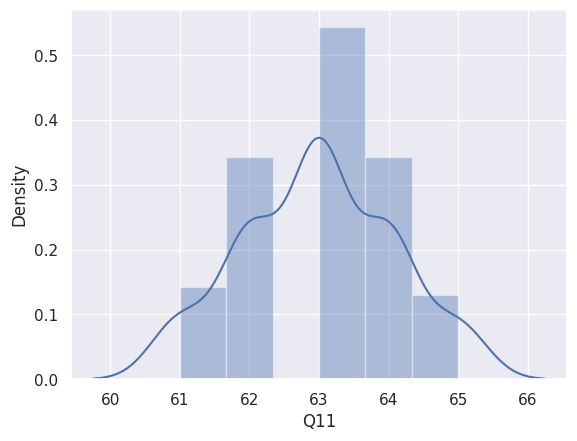

In [50]:
sns.distplot(data_for_kmeans['Q11'])

<ipython-input-51-a35bbe393157>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_for_kmeans['Q12'])


<Axes: xlabel='Q12', ylabel='Density'>

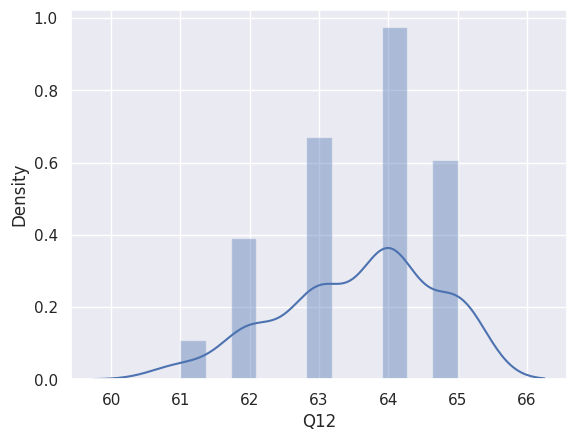

In [51]:
sns.distplot(data_for_kmeans['Q12'])

##Transforming the data
Clustering models are distance-based algorithms. In order to measure similarities between observations and form clusters they use a distance metric. So, features with high ranges will have a bigger influence on the clustering. Therefore, standardization is required before building a clustering model. The primary purpose of data standardization is to improve data quality, reduce costs, and better decision-making. Data standardization can also help to enhance communication and collaboration between different teams and departments.

In [ ]:
X = data_for_kmeans
data_for_kmeans[['Q1_T', 'Q2_T', 'Q3_T', 'Q4_T', 'Q5_T', 'Q6_T', 'Q7_T', 'Q8_T','Q9_T', 'Q10_T', 'Q11_T', 'Q12_T','Q13_T', 'Q14_T', 'Q15_T', 'Q16_T','Q17_T', 'Q18_T', 'Q19_T', 'Q20_T', 'Q21_T', 'Q22_T']] = scaler.fit_transform(X)

In [52]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

##Identifying Optimum Number of Clusters
There are a number of ways to identify the optimum number of clusters. The method we are going to look at below is known as the Elbow method.
The Elbow plot allows us to plot the inertia, which is a measure of how well the data was

In [53]:
def optimise_k_means(data, k_max):
  wcss=[]
  for i in range(1,k_max):
    kmeans = KMeans(i)
    kmeans.fit(data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

  number_clusters = range(1,k_max)
  plt.plot(number_clusters,wcss)
  plt.title('The Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

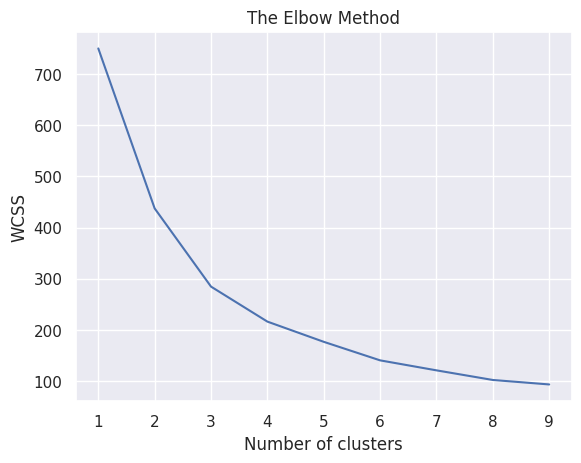

In [54]:
optimise_k_means(principal_components, 10)

In [60]:
kmeans = KMeans(4)
kmeans.fit(principal_components)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [61]:
data_for_kmeans['kmeans_4'] = kmeans.labels_
data_for_kmeans.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,kmeans_3,kmeans_4
0,1,3,8,11,14,18,32,34,40,48,65,63,51,56,60,68,72,74,48,48,76,79,2,2
1,2,4,9,13,14,19,32,34,41,48,62,65,49,54,59,67,71,74,75,47,78,81,2,2
2,1,4,9,13,14,19,33,34,41,48,64,63,49,54,59,68,71,74,48,48,78,80,2,2
3,1,4,9,13,14,18,33,34,41,48,63,65,49,55,60,68,72,42,48,46,78,81,2,2
4,1,4,9,13,15,19,33,37,40,42,64,62,51,55,59,67,72,73,48,47,77,79,0,3


In [62]:
identified_clusters = kmeans.fit_predict(principal_components)
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 1, 0, 3, 1, 0, 3, 3, 3, 0, 0, 3,
       3, 2, 0, 3, 1, 0, 3, 3, 3, 3, 0, 3, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0,
       2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 3, 2, 1, 0, 2, 0, 1, 1, 0, 3, 3,
       1, 3, 1, 0, 1, 3, 1, 0, 3, 1, 0, 3, 0, 3, 2, 1, 0, 3, 1, 1, 1, 1,
       0, 3, 1, 0, 3, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2,
       1, 0, 0, 2, 0, 2, 1, 0, 3, 2, 0, 2, 3, 2, 2, 2, 3], dtype=int32)

###Silhouette score
The silhouette score is a useful metric for evaluating the quality of a clustering solution, helping to choose the optimal number of clusters or compare different clustering algorithms. A higher silhouette score generally indicates better-defined clusters.

  * If the silhouette score is close to 1, it suggests that the object is well-matched to its own cluster and poorly matched to neighboring clusters.
  * If it is close to -1, it indicates that the object is poorly matched to its own cluster and well-matched to neighboring clusters.
  * A score around 0 suggests overlapping clusters.






In [58]:
from sklearn.metrics import silhouette_score

In [ ]:
# Silhouette score for (2 clusters)
silhouette_avg = silhouette_score(principal_components, identified_clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3581988317291627


In [59]:
# Silhouette score for (3 clusters)
silhouette_avg = silhouette_score(principal_components, identified_clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.38848163908410127


In [63]:
# Silhouette score for (4 clusters)
silhouette_avg = silhouette_score(principal_components, identified_clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3686758295589186


In [ ]:
# Silhouette score for (5 clusters)
silhouette_avg = silhouette_score(principal_components, identified_clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3588974904657125


In [ ]:
# Silhouette score for (6 clusters)
silhouette_avg = silhouette_score(principal_components, identified_clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3476865387128848


In [ ]:
# Silhouette score for (7 clusters)
silhouette_avg = silhouette_score(principal_components, identified_clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3515663422992841


In [ ]:
silhouette_arr = [0.358,0.389, 0.372,0.358,0.347, 0.351]

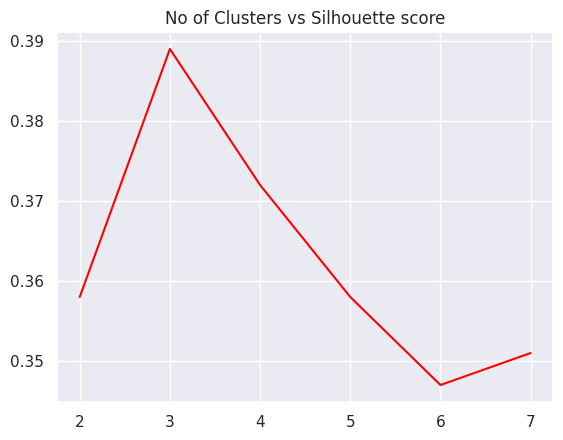

In [ ]:
x = np.array([2, 3, 4, 5, 6, 7])
y = np.array(silhouette_arr)

plt.title("No of Clusters vs Silhouette score")
plt.plot(x, y, color="red")

plt.show()

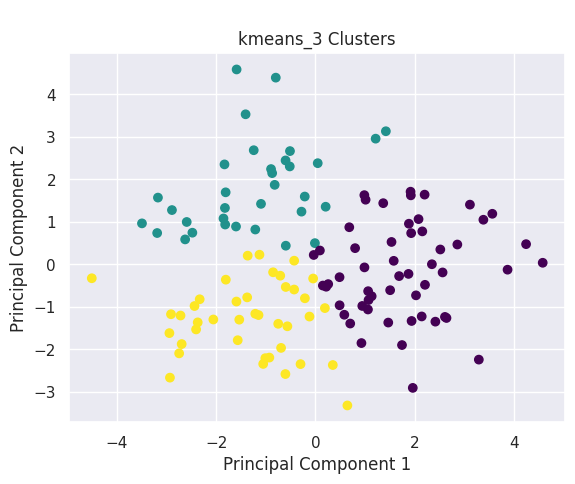

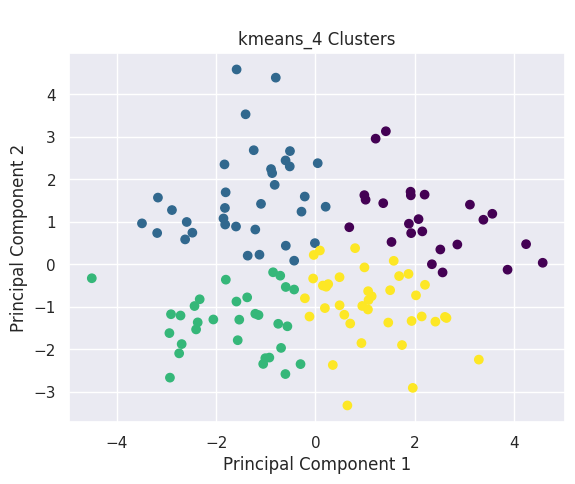

In [138]:
# Visualize the results (for 2D data)
kmeans = ["kmeans_3", "kmeans_4"]
for i in kmeans:
  plt.scatter(principal_components[:, 0], principal_components[:, 1], c=data_for_kmeans[i], cmap='viridis')
  plt.title(f'\n{i} Clusters')
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.show(i)

In [ ]:
from IPython.display import FileLink, FileLinks

data_for_kmeans.to_csv('/content/drive/MyDrive/csv_files/updatedLabelledData.csv', index=False)

FileLinks('/content/drive/MyDrive/csv_files/')

##Classification

In [72]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [73]:
dataframe = data_for_kmeans.copy()
dataframe.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,kmeans_3,kmeans_4
0,1,3,8,11,14,18,32,34,40,48,65,63,51,56,60,68,72,74,48,48,76,79,2,2
1,2,4,9,13,14,19,32,34,41,48,62,65,49,54,59,67,71,74,75,47,78,81,2,2
2,1,4,9,13,14,19,33,34,41,48,64,63,49,54,59,68,71,74,48,48,78,80,2,2
3,1,4,9,13,14,18,33,34,41,48,63,65,49,55,60,68,72,42,48,46,78,81,2,2
4,1,4,9,13,15,19,33,37,40,42,64,62,51,55,59,67,72,73,48,47,77,79,0,3


In [97]:
# Splitting dataset into two variables x (independent variable) and y (dependent/target variable)
X= dataframe.iloc[:,:-2]
X

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22
0,1,3,8,11,14,18,32,34,40,48,65,63,51,56,60,68,72,74,48,48,76,79
1,2,4,9,13,14,19,32,34,41,48,62,65,49,54,59,67,71,74,75,47,78,81
2,1,4,9,13,14,19,33,34,41,48,64,63,49,54,59,68,71,74,48,48,78,80
3,1,4,9,13,14,18,33,34,41,48,63,65,49,55,60,68,72,42,48,46,78,81
4,1,4,9,13,15,19,33,37,40,42,64,62,51,55,59,67,72,73,48,47,77,79
5,1,4,9,13,14,19,32,34,41,42,62,62,51,56,58,68,72,73,75,48,77,81
6,1,4,9,13,15,19,33,34,40,47,62,62,50,56,60,67,72,42,75,48,77,80
7,1,4,8,13,16,19,32,34,40,42,64,63,51,56,58,67,72,74,75,48,76,81
8,1,4,9,10,16,18,33,34,39,47,62,62,51,55,58,67,72,73,75,46,77,82
9,1,4,9,10,14,19,32,36,39,42,61,63,51,55,58,67,72,73,75,48,77,81


In [98]:
y= dataframe.iloc[:,22]       # target variable y=”Q21”
y

0      2
1      2
2      2
3      2
4      0
5      2
6      2
7      0
8      0
9      0
10     0
11     1
12     0
13     2
14     1
15     0
16     2
17     2
18     2
19     0
20     0
21     2
22     2
23     0
24     0
25     2
26     1
27     0
28     2
29     2
30     2
31     2
32     0
33     2
34     0
35     0
36     1
37     2
38     1
39     0
40     1
41     0
42     1
43     2
44     0
45     0
46     0
47     1
48     1
49     1
50     1
51     1
52     0
53     1
54     0
55     2
56     0
57     1
58     2
59     0
60     2
61     1
62     1
63     0
64     2
65     2
66     2
67     2
68     1
69     0
70     1
71     2
72     1
73     0
74     2
75     1
76     0
77     2
78     0
79     2
80     0
81     1
82     0
83     2
84     1
85     1
86     1
87     1
88     0
89     2
90     1
91     0
92     2
93     0
94     0
95     0
96     2
97     0
98     1
99     2
100    1
101    1
102    0
103    0
104    1
105    1
106    0
107    0
108    0
109    0
110    1
1

In [100]:
def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds


In [101]:
# Define the number of folds (K)
k = 10

In [102]:
# Get the fold indices
fold_indices = kfold_indices(X, k)

In [131]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Initialize your machine learning model (e.g., Logistic Regression)
model = RandomForestClassifier()

# Initialize a list to store the evaluation scores
scores = []

# Iterate through each fold
for train_indices, test_indices in fold_indices:

    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.20, random_state=1)

    # Train the model on the training data
    model.fit(Xtrain, ytrain)

    # Make predictions on the test data
    y_pred = model.predict(Xtest)

    # Calculate the accuracy score for this fold
    fold_score = accuracy_score(ytest, y_pred)

    # Append the fold score to the list of scores
    scores.append(fold_score)



In [132]:
# Display the accuracy scores for each fold
for i, score in enumerate(scores):
    print(f"Fold {i + 1} Accuracy: {score:.4f}")

Fold 1 Accuracy: 0.8462
Fold 2 Accuracy: 0.8077
Fold 3 Accuracy: 0.8077
Fold 4 Accuracy: 0.8462
Fold 5 Accuracy: 0.8077
Fold 6 Accuracy: 0.8462
Fold 7 Accuracy: 0.8462
Fold 8 Accuracy: 0.8462
Fold 9 Accuracy: 0.8077
Fold 10 Accuracy: 0.8462


In [133]:
# Calculate and display the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print(f"\nMean Accuracy: {mean_accuracy:.4f}")


Mean Accuracy: 0.8308


In [ ]:
pip install tensorflow

In [120]:
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold


# Normalize input data (optional but recommended for neural networks)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Convert labels to one-hot encoding
y_one_hot = tf.keras.utils.to_categorical(y, num_classes=len(np.unique(y)))

# Define neural network architecture
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes for Iris dataset
])

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the number of folds for cross-validation
num_folds = 10
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation
fold_accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_one_hot[train_index], y_one_hot[test_index]

    # Train the model
    model2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the test set
    _, accuracy = model2.evaluate(X_test, y_test, verbose=0)
    fold_accuracies.append(accuracy)

# Display the accuracy for each fold
for i, accuracy in enumerate(fold_accuracies):
    print(f"Fold {i + 1} Accuracy: {accuracy:.4f}")

# Calculate and display the mean accuracy across all folds
mean_accuracy2 = np.mean(fold_accuracies)
print(f"\nMean Accuracy: {mean_accuracy2:.4f}")


Fold 1 Accuracy: 1.0000
Fold 2 Accuracy: 1.0000
Fold 3 Accuracy: 1.0000
Fold 4 Accuracy: 1.0000
Fold 5 Accuracy: 1.0000
Fold 6 Accuracy: 1.0000
Fold 7 Accuracy: 1.0000
Fold 8 Accuracy: 1.0000
Fold 9 Accuracy: 1.0000
Fold 10 Accuracy: 1.0000

Mean Accuracy: 1.0000


In [125]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression  # Replace with your model of choice

# Initialize your machine learning model (e.g., Logistic Regression)
model3 = LogisticRegression()

# Initialize a list to store the evaluation scores
scores3 = []

# Iterate through each fold
for train_indices, test_indices in fold_indices:
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]

    # Train the model on the training data
    model3.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model3.predict(X_test)

    # Calculate the accuracy score for this fold
    fold_score = accuracy_score(y_test, y_pred)

    # Append the fold score to the list of scores
    scores3.append(fold_score)


In [126]:
# Display the accuracy scores for each fold
for i, score in enumerate(scores3):
    print(f"Fold {i + 1} Accuracy: {score:.4f}")

Fold 1 Accuracy: 1.0000
Fold 2 Accuracy: 1.0000
Fold 3 Accuracy: 0.9167
Fold 4 Accuracy: 0.9167
Fold 5 Accuracy: 0.7500
Fold 6 Accuracy: 0.9167
Fold 7 Accuracy: 0.9167
Fold 8 Accuracy: 1.0000
Fold 9 Accuracy: 0.9167
Fold 10 Accuracy: 0.8333


In [127]:
# Calculate and display the mean accuracy across all folds
mean_accuracy3= np.mean(scores3)
print(f"\nMean Accuracy: {mean_accuracy3:.4f}")


Mean Accuracy: 0.9167
